In [347]:
# Import required libraries into the jupyter notebook

import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # visualization
import seaborn as sns
from sqlite3 import connect
conn = connect(':memory:')


# Beginning Code blocks to do the things I want it to do

In [348]:
# Step to read in weather data and pizza data csv files from the data directory
weather_file = pd.read_csv("data/alexandria_weather_data.csv", low_memory=False)
pizza_file = pd.read_csv("data/alexandria_pizza_data.csv", low_memory=False)

# Reading in a second 'golden' copy that can be used for basic calculations with original numbers
gold_weather_file = pd.read_csv("data/alexandria_weather_data.csv", low_memory=False)

In [349]:
# Display head of weather file to show successful read of file
weather_file.head()

,name,datetime,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,...,solarenergy,uvindex,severerisk,sunrise,sunset,moonphase,conditions,description,icon,stations
0,41001,3/1/2021,55,32,42,55.0,23.9,35.3,28.8,62.0,...,12.9,6,NaN,2021-03-01T07:09:32,2021-03-01T18:30:39,0.58,"Rain, Partially cloudy",Clearing in the afternoon with early morning r...,rain,"KI69,KLUK,E5157,72421093814,KCVG,72429793812,A..."
1,41001,3/2/2021,44,24,33,44.4,16.6,28.6,16.5,52.2,...,17.1,7,NaN,2021-03-02T07:08:04,2021-03-02T18:31:42,0.62,Clear,Clear conditions throughout the day.,clear-day,"KI69,F8613,KLUK,E5157,72421093814,KCVG,7242979..."
2,41001,3/3/2021,62,27,44,62.1,22.7,42.2,26.6,54.2,...,16.6,7,NaN,2021-03-03T07:06:36,2021-03-03T18:32:45,0.65,Clear,Clear conditions throughout the day.,clear-day,"KI69,F8613,KLUK,E5157,72421093814,KCVG,7242979..."
3,41001,3/4/2021,52,30,41,51.9,23.2,36.7,25.9,57.3,...,16.9,7,NaN,2021-03-04T07:05:07,2021-03-04T18:33:47,0.69,Clear,Clear conditions throughout the day.,clear-day,"KI69,F8613,KLUK,E5157,72421093814,KCVG,7242979..."
4,41001,3/5/2021,47,25,35,42.2,18.4,31.0,18.9,54.5,...,17.2,7,NaN,2021-03-05T07:03:38,2021-03-05T18:34:50,0.75,Clear,Clear conditions throughout the day.,clear-day,"KI69,KLUK,E5157,72421093814,KCVG,72429793812,A..."


In [350]:
# Diesply head of pizza date file to show successful read of file
pizza_file.head()

,BusDate,DayofWeek,OrderID,OtotSubTotal,OrdServiceType,OrdVoidDate,OrdTaxExemptID,OrdOnlineOrderID,PmtType
0,3/1/2021,Monday,3,19.60,1,NaN,NaN,NaN,3
1,3/1/2021,Monday,2,20.74,3,NaN,NaN,NaN,3
2,3/1/2021,Monday,5,20.97,1,NaN,NaN,NaN,3
3,3/1/2021,Monday,6,9.99,1,NaN,NaN,NaN,3
4,3/1/2021,Monday,10,26.27,1,NaN,NaN,NaN,3


In [351]:
# Adding step to round values for early basic calculations
gold_weather_file.temp = gold_weather_file.temp.round(-1) 
gold_weather_file.precip = gold_weather_file.precip.round(2)

# Add stepto temp and precip values to allow for better visualization
weather_file.temp = weather_file.temp * 20
weather_file.precip = weather_file.precip * 2000

weather_file.head()

,name,datetime,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,...,solarenergy,uvindex,severerisk,sunrise,sunset,moonphase,conditions,description,icon,stations
0,41001,3/1/2021,55,32,840,55.0,23.9,35.3,28.8,62.0,...,12.9,6,NaN,2021-03-01T07:09:32,2021-03-01T18:30:39,0.58,"Rain, Partially cloudy",Clearing in the afternoon with early morning r...,rain,"KI69,KLUK,E5157,72421093814,KCVG,72429793812,A..."
1,41001,3/2/2021,44,24,660,44.4,16.6,28.6,16.5,52.2,...,17.1,7,NaN,2021-03-02T07:08:04,2021-03-02T18:31:42,0.62,Clear,Clear conditions throughout the day.,clear-day,"KI69,F8613,KLUK,E5157,72421093814,KCVG,7242979..."
2,41001,3/3/2021,62,27,880,62.1,22.7,42.2,26.6,54.2,...,16.6,7,NaN,2021-03-03T07:06:36,2021-03-03T18:32:45,0.65,Clear,Clear conditions throughout the day.,clear-day,"KI69,F8613,KLUK,E5157,72421093814,KCVG,7242979..."
3,41001,3/4/2021,52,30,820,51.9,23.2,36.7,25.9,57.3,...,16.9,7,NaN,2021-03-04T07:05:07,2021-03-04T18:33:47,0.69,Clear,Clear conditions throughout the day.,clear-day,"KI69,F8613,KLUK,E5157,72421093814,KCVG,7242979..."
4,41001,3/5/2021,47,25,700,42.2,18.4,31.0,18.9,54.5,...,17.2,7,NaN,2021-03-05T07:03:38,2021-03-05T18:34:50,0.75,Clear,Clear conditions throughout the day.,clear-day,"KI69,KLUK,E5157,72421093814,KCVG,72429793812,A..."


In [352]:
# Cleaning data ahead of the merge since there were column warnings above

pizza_file.drop(['OrdVoidDate', 'OrdTaxExemptID', 'OrdOnlineOrderID', 'PmtType'],axis=1,inplace=True)
weather_file.drop(['name', 'icon', 'stations', 'sunrise', 'sunset', 'moonphase', 'conditions', 'description'],axis=1,inplace=True)

pizza_file
#pizza_file.head()

,BusDate,DayofWeek,OrderID,OtotSubTotal,OrdServiceType
0,3/1/2021,Monday,3,19.60,1
1,3/1/2021,Monday,2,20.74,3
2,3/1/2021,Monday,5,20.97,1
3,3/1/2021,Monday,6,9.99,1
4,3/1/2021,Monday,10,26.27,1
...,...,...,...,...,...
93481,10/31/2023,Tuesday,173,10.49,1
93482,10/31/2023,Tuesday,25,64.69,1
93483,10/31/2023,Tuesday,122,23.98,1
93484,10/31/2023,Tuesday,155,19.98,1


In [353]:
weather_file.head()

,datetime,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,precip,...,windgust,windspeed,winddir,sealevelpressure,cloudcover,visibility,solarradiation,solarenergy,uvindex,severerisk
0,3/1/2021,55,32,840,55.0,23.9,35.3,28.8,62.0,62.0,...,27.1,16.7,319.2,1019.8,47.7,9.7,152.6,12.9,6,NaN
1,3/2/2021,44,24,660,44.4,16.6,28.6,16.5,52.2,0.0,...,NaN,8.9,49.6,1026.0,0.5,9.9,197.2,17.1,7,NaN
2,3/3/2021,62,27,880,62.1,22.7,42.2,26.6,54.2,0.0,...,19.3,13.6,232.9,1017.5,0.0,9.9,194.3,16.6,7,NaN
3,3/4/2021,52,30,820,51.9,23.2,36.7,25.9,57.3,0.0,...,25.7,16.4,358.6,1021.9,1.3,9.9,197.0,16.9,7,NaN
4,3/5/2021,47,25,700,42.2,18.4,31.0,18.9,54.5,0.0,...,20.8,11.3,357.0,1026.0,7.7,9.9,201.1,17.2,7,NaN


In [354]:
gold_weather_file.head()

,name,datetime,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,...,solarenergy,uvindex,severerisk,sunrise,sunset,moonphase,conditions,description,icon,stations
0,41001,3/1/2021,55,32,40,55.0,23.9,35.3,28.8,62.0,...,12.9,6,NaN,2021-03-01T07:09:32,2021-03-01T18:30:39,0.58,"Rain, Partially cloudy",Clearing in the afternoon with early morning r...,rain,"KI69,KLUK,E5157,72421093814,KCVG,72429793812,A..."
1,41001,3/2/2021,44,24,30,44.4,16.6,28.6,16.5,52.2,...,17.1,7,NaN,2021-03-02T07:08:04,2021-03-02T18:31:42,0.62,Clear,Clear conditions throughout the day.,clear-day,"KI69,F8613,KLUK,E5157,72421093814,KCVG,7242979..."
2,41001,3/3/2021,62,27,40,62.1,22.7,42.2,26.6,54.2,...,16.6,7,NaN,2021-03-03T07:06:36,2021-03-03T18:32:45,0.65,Clear,Clear conditions throughout the day.,clear-day,"KI69,F8613,KLUK,E5157,72421093814,KCVG,7242979..."
3,41001,3/4/2021,52,30,40,51.9,23.2,36.7,25.9,57.3,...,16.9,7,NaN,2021-03-04T07:05:07,2021-03-04T18:33:47,0.69,Clear,Clear conditions throughout the day.,clear-day,"KI69,F8613,KLUK,E5157,72421093814,KCVG,7242979..."
4,41001,3/5/2021,47,25,40,42.2,18.4,31.0,18.9,54.5,...,17.2,7,NaN,2021-03-05T07:03:38,2021-03-05T18:34:50,0.75,Clear,Clear conditions throughout the day.,clear-day,"KI69,KLUK,E5157,72421093814,KCVG,72429793812,A..."


In [355]:
#Changing date columns to be in format compatible with matplotlib
pizza_file['BusDate'] = pd.to_datetime(pizza_file['BusDate'])
weather_file['datetime'] = pd.to_datetime(weather_file['datetime'])
gold_weather_file['datetime'] = pd.to_datetime(weather_file['datetime'])
pizza_file

,BusDate,DayofWeek,OrderID,OtotSubTotal,OrdServiceType
0,2021-03-01,Monday,3,19.60,1
1,2021-03-01,Monday,2,20.74,3
2,2021-03-01,Monday,5,20.97,1
3,2021-03-01,Monday,6,9.99,1
4,2021-03-01,Monday,10,26.27,1
...,...,...,...,...,...
93481,2023-10-31,Tuesday,173,10.49,1
93482,2023-10-31,Tuesday,25,64.69,1
93483,2023-10-31,Tuesday,122,23.98,1
93484,2023-10-31,Tuesday,155,19.98,1


In [356]:
# Creating 2 combined datasets for use throughout the project. First one is 'gold', which will contain original data only
# Second dataset has adjusted values for 'temp' and 'precip' to show correlation with sales data.
gold_combined_dataset = pizza_file.merge(gold_weather_file, how='left', left_on="BusDate", right_on='datetime', suffixes=('_x', '_y'))
combined_dataset = pizza_file.merge(weather_file, how='left', left_on="BusDate", right_on='datetime', suffixes=('_x', '_y'))
# Adding the daily sum total to the dataframe to allow for visualization
combined_dataset['DailySum'] = combined_dataset.groupby('BusDate')['OtotSubTotal'].transform('sum')


#Reading dataframe into SQL
combined_dataset.to_sql(name='combined_db', con=conn)
pizza_file.to_sql(name='pizza_db', con=conn)
weather_file.to_sql(name='weather_db', con=conn)

# Displaying combined dataset to ensure it created properly
combined_dataset.head()



,BusDate,DayofWeek,OrderID,OtotSubTotal,OrdServiceType,datetime,tempmax,tempmin,temp,feelslikemax,...,windspeed,winddir,sealevelpressure,cloudcover,visibility,solarradiation,solarenergy,uvindex,severerisk,DailySum
0,2021-03-01,Monday,3,19.60,1,2021-03-01,55,32,840,55.0,...,16.7,319.2,1019.8,47.7,9.7,152.6,12.9,6,NaN,1416.76
1,2021-03-01,Monday,2,20.74,3,2021-03-01,55,32,840,55.0,...,16.7,319.2,1019.8,47.7,9.7,152.6,12.9,6,NaN,1416.76
2,2021-03-01,Monday,5,20.97,1,2021-03-01,55,32,840,55.0,...,16.7,319.2,1019.8,47.7,9.7,152.6,12.9,6,NaN,1416.76
3,2021-03-01,Monday,6,9.99,1,2021-03-01,55,32,840,55.0,...,16.7,319.2,1019.8,47.7,9.7,152.6,12.9,6,NaN,1416.76
4,2021-03-01,Monday,10,26.27,1,2021-03-01,55,32,840,55.0,...,16.7,319.2,1019.8,47.7,9.7,152.6,12.9,6,NaN,1416.76


In [357]:
# This cell will be used to try to sample the data and show various counts

orders_per_day = combined_dataset.DayofWeek.value_counts()
orders_per_day

DayofWeek
Friday       20113
Saturday     18462
Sunday       13451
Thursday     11603
Wednesday    10712
Tuesday       9945
Monday        9200
Name: count, dtype: int64

<Axes: title={'center': 'Number of Orders per Day of Week'}, xlabel='DayofWeek'>

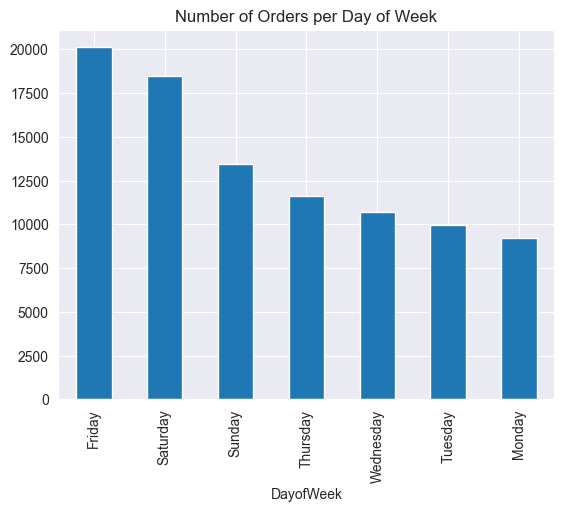

In [493]:
# First visualizations from the dataframes I have created
# First up is orders per day. 
orders_per_day.plot(kind="bar", title='Number of Orders per Day of Week')

In [359]:
# This cell will be used to try to sample the data and show various counts

orders_per_avgtemp = gold_combined_dataset.temp.value_counts()
orders_per_avgtemp

temp
70    23761
60    17951
80    14784
50    14123
40    14014
30     6726
20     1927
10      124
0        76
Name: count, dtype: int64

<Axes: title={'center': 'Number of Orders per Temperature'}, xlabel='temp'>

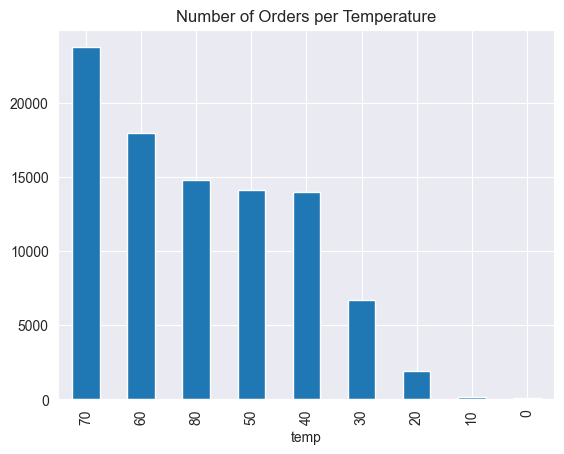

In [492]:
orders_per_avgtemp.plot(kind="bar", title='Number of Orders per Temperature')

In [361]:
orders_per_precip = gold_combined_dataset.precip.value_counts()
orders_per_precip.to_csv("data/OrdersPrecip.csv")
orders_per_precip

precip
0.00    57199
0.01     5123
0.02     2846
0.04     1675
0.07     1390
        ...  
0.73       62
0.29       62
1.37       58
0.54       53
0.84       50
Name: count, Length: 87, dtype: int64

In [434]:
# Steps to create dataframes for daily pizza sales 

#First, limiting the columns being selected
limited_dataset = combined_dataset[["BusDate", "DayofWeek", "temp"]]

# Weekend
friday_select = (limited_dataset.DayofWeek == 'Friday')
friday_orders = limited_dataset[friday_select]
saturday_select = (limited_dataset.DayofWeek == 'Saturday')
saturday_orders = limited_dataset[saturday_select]
sunday_select = (limited_dataset.DayofWeek == 'Sunday')
sunday_orders = limited_dataset[sunday_select]
weekend_orders = pd.concat([friday_orders, saturday_orders, sunday_orders])

# Weekday
monday_select = (limited_dataset.DayofWeek == "Monday")
monday_orders = limited_dataset[monday_select]
tuesday_select = (limited_dataset.DayofWeek == "Tuesday")
tuesday_orders = limited_dataset[tuesday_select]
wednesday_select = (limited_dataset.DayofWeek == "Wednesday")
wednesday_orders = limited_dataset[wednesday_select]
thursday_select = (limited_dataset.DayofWeek == "Thursday")
thursday_orders = limited_dataset[thursday_select]
montues_orders = pd.concat([monday_orders, tuesday_orders])
weekday_orders = pd.concat([monday_orders, tuesday_orders, wednesday_orders, thursday_orders])


friday_orders

,BusDate,DayofWeek,temp
267,2021-03-05,Friday,700
268,2021-03-05,Friday,700
269,2021-03-05,Friday,700
270,2021-03-05,Friday,700
271,2021-03-05,Friday,700
...,...,...,...
92990,2023-10-27,Friday,1340
92991,2023-10-27,Friday,1340
92992,2023-10-27,Friday,1340
92993,2023-10-27,Friday,1340


<Axes: title={'center': 'Revenue Average and Distribution by Day of Week'}>

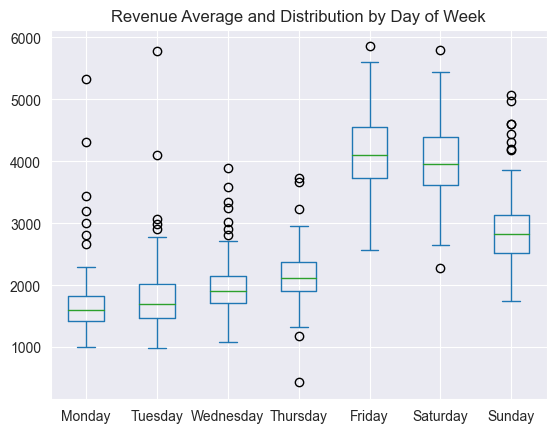

In [491]:
# Working on building the dataframe for showing each day of sales across time

mon_df = pd.read_sql("select distinct BusDate, DailySum as 'Monday' from combined_db where DayofWeek = 'Monday'", conn)
mon_df = mon_df.drop('BusDate', axis=1)
tue_df = pd.read_sql("select distinct BusDate, DailySum as 'Tuesday' from combined_db where DayofWeek = 'Tuesday'", conn)
tue_df = tue_df.drop('BusDate', axis=1)
wed_df = pd.read_sql("select distinct BusDate, DailySum as 'Wednesday' from combined_db where DayofWeek = 'Wednesday'", conn)
wed_df = wed_df.drop('BusDate', axis=1)
thu_df = pd.read_sql("select distinct BusDate, DailySum as 'Thursday' from combined_db where DayofWeek = 'Thursday'", conn)
thu_df = thu_df.drop('BusDate', axis=1)
fri_df = pd.read_sql("select distinct BusDate, DailySum as 'Friday' from combined_db where DayofWeek = 'Friday'", conn)
fri_df = fri_df.drop('BusDate', axis=1)
sat_df = pd.read_sql("select distinct BusDate, DailySum as 'Saturday' from combined_db where DayofWeek = 'Saturday'", conn)
sat_df = sat_df.drop('BusDate', axis=1)
sun_df = pd.read_sql("select distinct BusDate, DailySum as 'Sunday' from combined_db where DayofWeek = 'Sunday'", conn)
sun_df = sun_df.drop('BusDate', axis=1)

week_df = pd.concat([mon_df, tue_df, wed_df, thu_df, fri_df, sat_df, sun_df], axis=1)
weekday_df = pd.concat([mon_df, tue_df, wed_df, thu_df], axis=1)
weekend_df = pd.concat([fri_df, sat_df, sun_df], axis=1)
week_df.plot(kind='box', title='Revenue Average and Distribution by Day of Week')


<Axes: title={'center': 'Daily Revenue Trend (Weekend)'}>

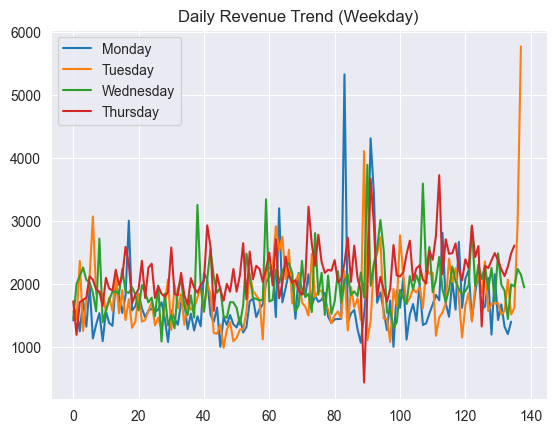

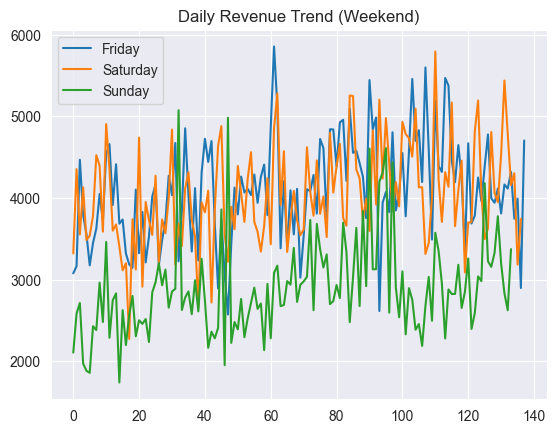

In [489]:
weekday_df.plot(kind="line", title='Daily Revenue Trend (Weekday)')
weekend_df.plot(kind="line", title='Daily Revenue Trend (Weekend)')

<Axes: title={'center': 'Revenue/Temp/Precip Daily Trend (Full Data)'}>

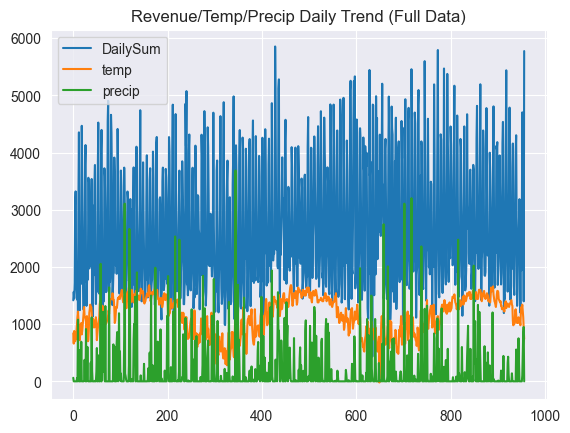

In [487]:
daily_sales_df = pd.read_sql('select distinct BusDate, DailySum, temp, precip from combined_db', conn)
daily_sales_df.plot(title="Revenue/Temp/Precip Daily Trend (Full Data)")

<Axes: title={'center': 'Revenue & Temperature Daily Trend (Sunday)'}>

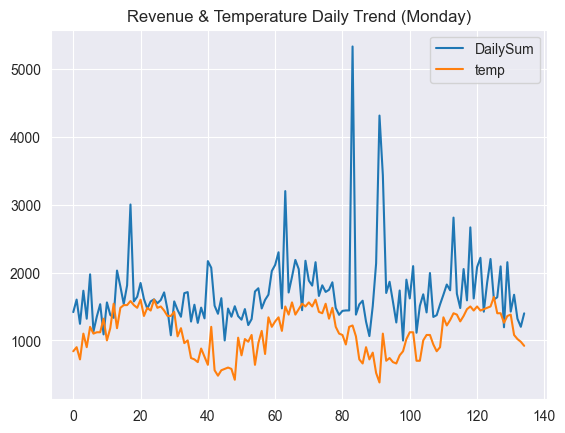

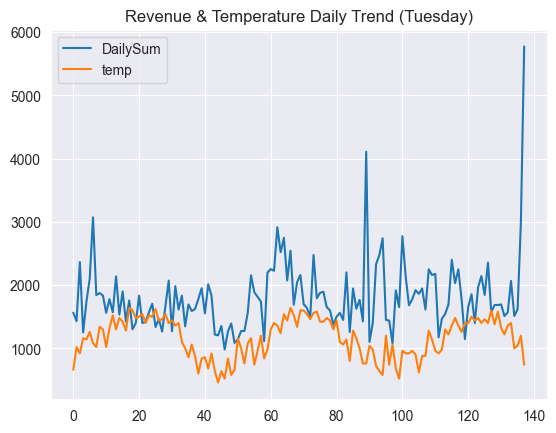

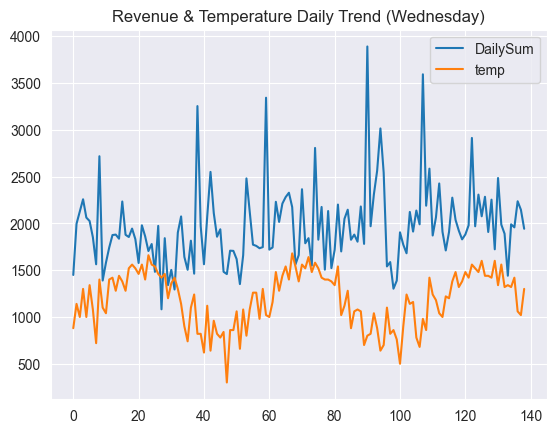

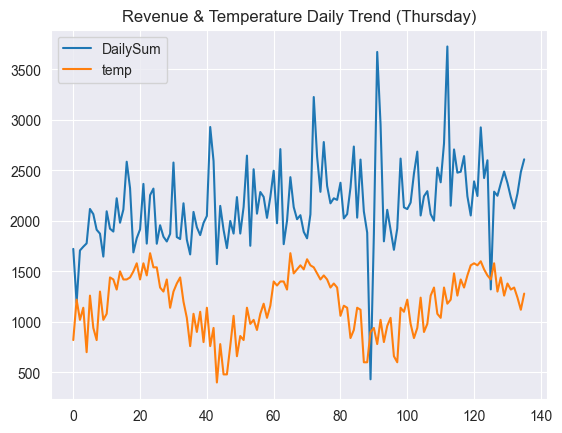

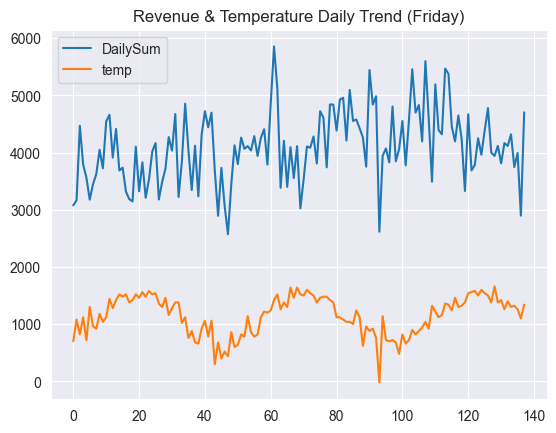

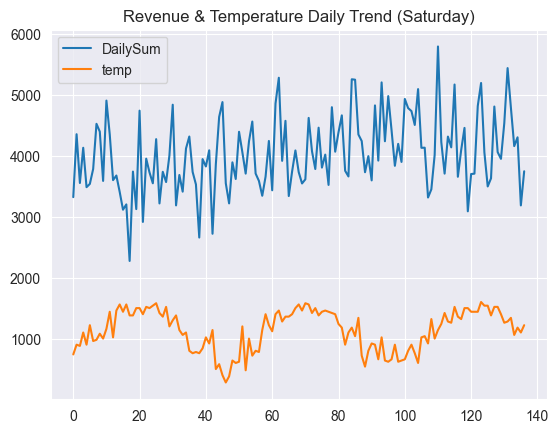

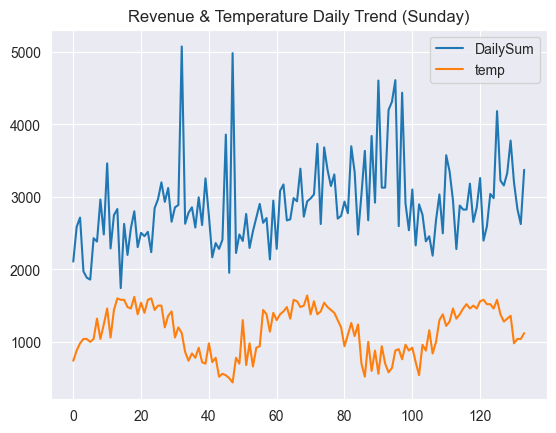

In [488]:
monday_sales_df = pd.read_sql("select distinct BusDate, DailySum, temp from combined_db where DayofWeek='Monday'", conn)
tuesday_sales_df = pd.read_sql("select distinct BusDate, DailySum, temp from combined_db where DayofWeek='Tuesday'", conn)
wednesday_sales_df = pd.read_sql("select distinct BusDate, DailySum, temp from combined_db where DayofWeek='Wednesday'", conn)
thursday_sales_df = pd.read_sql("select distinct BusDate, DailySum, temp from combined_db where DayofWeek='Thursday'", conn)
friday_sales_df = pd.read_sql("select distinct BusDate, DailySum, temp from combined_db where DayofWeek='Friday'", conn)
saturday_sales_df = pd.read_sql("select distinct BusDate, DailySum, temp from combined_db where DayofWeek='Saturday'", conn)
sunday_sales_df = pd.read_sql("select distinct BusDate, DailySum, temp from combined_db where DayofWeek='Sunday'", conn)

monday_sales_df.plot(title="Revenue & Temperature Daily Trend (Monday)")
tuesday_sales_df.plot(title="Revenue & Temperature Daily Trend (Tuesday)")
wednesday_sales_df.plot(title="Revenue & Temperature Daily Trend (Wednesday)")
thursday_sales_df.plot(title="Revenue & Temperature Daily Trend (Thursday)")
friday_sales_df.plot(title="Revenue & Temperature Daily Trend (Friday)")
saturday_sales_df.plot(title="Revenue & Temperature Daily Trend (Saturday)")
sunday_sales_df.plot(title="Revenue & Temperature Daily Trend (Sunday)")

<Axes: title={'center': 'Daily Orders per Temperature'}, xlabel='temp', ylabel='num_orders'>

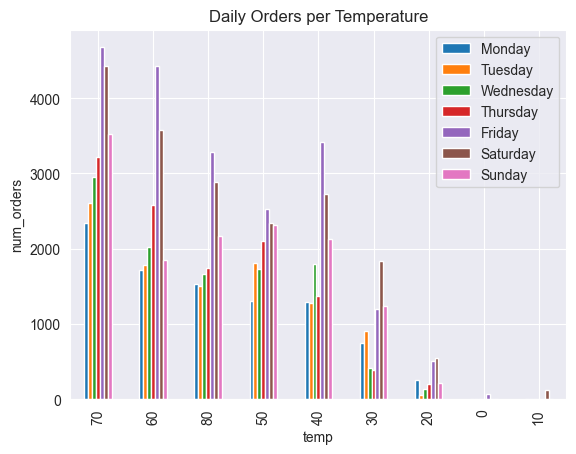

In [474]:
# Steps to create dataframes for daily pizza sales 

#First, limiting the columns being selected
gold_lim_data = gold_combined_dataset[["BusDate", "DayofWeek", "temp"]]

# Weekend
fri_sel = (gold_lim_data.DayofWeek == 'Friday')
fri_gold = gold_lim_data[friday_select]
sat_sel = (gold_lim_data.DayofWeek == 'Saturday')
sat_gold = gold_lim_data[saturday_select]
sun_sel = (gold_lim_data.DayofWeek == 'Sunday')
sun_gold = gold_lim_data[sunday_select]
mon_sel = (gold_lim_data.DayofWeek == "Monday")
mon_gold = gold_lim_data[monday_select]
tue_sel = (gold_lim_data.DayofWeek == "Tuesday")
tue_gold = gold_lim_data[tuesday_select]
wed_sel = (gold_lim_data.DayofWeek == "Wednesday")
wed_gold = gold_lim_data[wednesday_select]
thu_sel = (gold_lim_data.DayofWeek == "Thursday")
thu_gold = gold_lim_data[thursday_select]

#Visualizations for Most popular temperature by day
mon_gold_avgtemp = mon_gold.temp.value_counts()
tue_gold_avgtemp = tue_gold.temp.value_counts()
wed_gold_avgtemp = wed_gold.temp.value_counts()
thu_gold_avgtemp = thu_gold.temp.value_counts()
fri_gold_avgtemp = fri_gold.temp.value_counts()
sat_gold_avgtemp = sat_gold.temp.value_counts()
sun_gold_avgtemp = sun_gold.temp.value_counts()


overall_gold_avgtemp = pd.concat([mon_gold_avgtemp, tue_gold_avgtemp, wed_gold_avgtemp, thu_gold_avgtemp, fri_gold_avgtemp, sat_gold_avgtemp, sun_gold_avgtemp], axis=1)
overall_gold_avgtemp.columns = ["Monday","Tuesday","Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

overall_gold_avgtemp.plot(kind='bar', ylabel='num_orders', title="Daily Orders per Temperature")

# Appendix

## Items below this line are being retained for information purposes only

In [ ]:
sales_by_day = combined_dataset.groupby('BusDate')['OtotSubTotal'].sum()
sales_by_day.plot()

<Axes: xlabel='BusDate'>

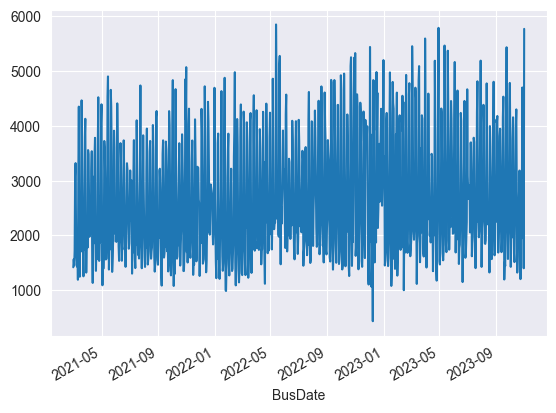

In [387]:
# Trying to sum transactions for the day to eventually show sales per day in a line graph

#combined_dataset.groupby('OtotSubTotal').max()
sales_total_day = combined_dataset.groupby('BusDate')['OtotSubTotal'].sum()
sales_total_day.plot()


<Axes: >

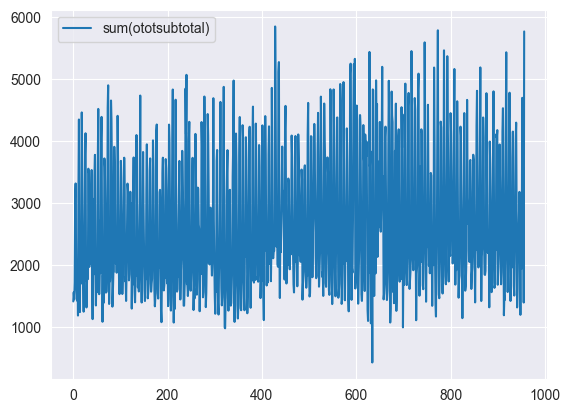

In [374]:
# Same as the cell above, only using DB commands instead of python
sales_df = pd.read_sql('select busdate, sum(ototsubtotal) from pizza_db group by busdate', conn)
sales_df.plot()

<Axes: >

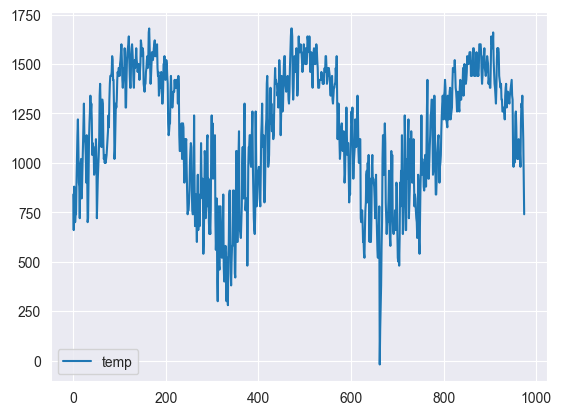

In [384]:
db_df = pd.read_sql('select datetime, temp from weather_db', conn)
db_df.plot()

In [385]:
# Creating a dataset to use for correlation
corr_dataset = pizza_file.merge(weather_file, how='left', left_on="BusDate", right_on='datetime')
corr_dataset.drop(['DayofWeek','preciptype'],axis=1,inplace=True)

corr_dataset.head()

,BusDate,OrderID,OtotSubTotal,OrdServiceType,datetime,tempmax,tempmin,temp,feelslikemax,feelslikemin,...,windgust,windspeed,winddir,sealevelpressure,cloudcover,visibility,solarradiation,solarenergy,uvindex,severerisk
0,2021-03-01,3,19.60,1,2021-03-01,55,32,840,55.0,23.9,...,27.1,16.7,319.2,1019.8,47.7,9.7,152.6,12.9,6,NaN
1,2021-03-01,2,20.74,3,2021-03-01,55,32,840,55.0,23.9,...,27.1,16.7,319.2,1019.8,47.7,9.7,152.6,12.9,6,NaN
2,2021-03-01,5,20.97,1,2021-03-01,55,32,840,55.0,23.9,...,27.1,16.7,319.2,1019.8,47.7,9.7,152.6,12.9,6,NaN
3,2021-03-01,6,9.99,1,2021-03-01,55,32,840,55.0,23.9,...,27.1,16.7,319.2,1019.8,47.7,9.7,152.6,12.9,6,NaN
4,2021-03-01,10,26.27,1,2021-03-01,55,32,840,55.0,23.9,...,27.1,16.7,319.2,1019.8,47.7,9.7,152.6,12.9,6,NaN


In [ ]:
# Correlation matrix for the combined dataframe

print(corr_dataset.corr())

corr_output = corr_dataset.corr()

# corr_output.to_csv("data/CorrResults.csv")  # Commenting this out since it is no longer required.
#corr_matrix

#Correlation matrix first try did not work - need to dig into previous class examples and find this to see if I can figure this out. Ending for the day
# Second try got closer - maybe try removing the dayofthe week column and try that.
# Third try worked by removing the columns with words

 #Working thoughts - What does order type/money spent tell us?, What about rounding precip and seeing number of orders based on amount of precip
 # Trend seems to show that the more it rains, the less people order pizza

In [ ]:
corr_dataset.head()

In [ ]:
sns.heatmap(corr_output, cmap='crest')

In [ ]:
x=combined_dataset["temp"]
y=combined_dataset["precip"]
plt.scatter(x,y)

In [ ]:
##Calculations here are no longer valid since the temperature value was multiplied and rounded differently

# Checking the correlation of temperature on Weekend days

#fri_orders_per_avgtemp = friday_orders.temp.value_counts()
#fri_orders_per_avgtemp

montues_orders_per_avgtemp = montues_orders.temp.value_counts().rename("numcount")
montues_orders_per_avgtemp

In [ ]:
# Weekday
#monday_select = (combined_dataset.DayofWeek == "Monday")
#monday_orders = combined_dataset[monday_select]
#tuesday_select = (combined_dataset.DayofWeek == "Tuesday")
#tuesday_orders = combined_dataset[tuesday_select]
#wednesday_select = (combined_dataset.DayofWeek == "Wednesday")
##wednesday_orders = combined_dataset[wednesday_select]
#thursday_select = (combined_dataset.DayofWeek == "Thursday")
#thursday_orders = combined_dataset[thursday_select]
#montues_orders = pd.concat([monday_orders, tuesday_orders])
#weekday_orders = pd.concat([monday_orders, tuesday_orders, wednesday_orders, thursday_orders])


# stopping point for today - need to setup dataframe to hold columns of information I want to visualize - 7 wide bar chart for pizza sales per precipitation
# or pizza sales per temperature - probably both.

In [ ]:
# Another way to graph the daily line graphs, but determined I did not need it
#tuesday_orders_graph = tuesday_orders[["DailySum","temp"]]
#tuesday_orders_graph.plot()